# 케라스 파이썬 라이브러리를 사용항 손글씨 숫자 분류 학습

* 흑백 손글씨 숫자 이미지 (28x28픽셀)을 10개의 범주(0-9)로 분류
* MNIST 데이터 셋 사용

In [1]:
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
#import numpy as np
#import tensorflow as tf

In [2]:
from keras.datasets import mnist

In [4]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

In [7]:
# 학습 데이터 확인
print(train_images.shape) # 8비트 정수형 3D 텐서
print(train_labels.shape) # 

(60000, 28, 28)
(60000,)


In [8]:
# 축의 개수를 확인 (ndim)
train_images.ndim # 3차원 (즉, 3개의 축으로 구성 k,n,m)
# 28x28 크기의 정수 행렬이 6만개가 있는 배열

3

In [9]:
len(train_labels)

60000

In [10]:
# 학습 레이블 확인 
train_labels 
# 데이터 타입(dtype)이 uint8 (unsigned int8) 0-255까지의 범위로 양수만 표현이 가능한
# 2^8개만큼 표현 가능 

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

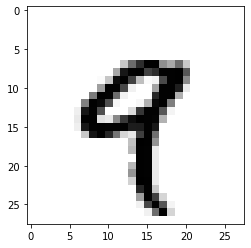

In [14]:
# 이미지 출력시키기
# 다섯번째 샘플을 matplotlib으로 이미지 확인
import matplotlib.pyplot as plt

digit = train_images[4]

plt.imshow(digit,cmap=plt.cm.binary) # display data as an image 
plt.show()

In [15]:
# 데이터 전처리 작업 : 3차원을 2차원 데이터로 변환
# 0과 1사이의 값을 가지는 float32 타입의 (60000,28*28)의 2차원 배열로 변환 (60000,784)
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255

# (10000,28*28) 크기의 2차원 배열로 변경 (10000,784)
test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255


In [17]:
print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [18]:
train_images.ndim # 2차원으로 변환됨

2

In [20]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## 작업순서
1. 모델설정
2. 컴파일
3. 모델 실행 (학습)
4. 모델 평가 (evaluation)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
import numpy as np
import tensorflow as tf



In [23]:
tf.random.set_seed(3)

In [24]:
# 1. 모델 설정
# 딥러닝의 구조와 층을 설정하는 단계
network = Sequential() # 일반적으로 model이라는 이름을 줌
network.add(Dense(512,activation='relu',input_shape=(28*28,)))
network.add(Dense(10,activation='softmax'))
 
# 2. 컴파일 : 실행 전 loss, optimizer, metrics 설정하는 단계
network.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

# 3. 모델실행 (학습)
network.fit(train_images,train_labels,epochs=5,batch_size=128)

# 4. 모델 평가
test_loss, test_acc = network.evaluate(test_images,test_labels)

print('test_acc : ',test_acc)
print('test_loss : ',test_loss)

# 60000개를 128번으로 나누어서 469개씩
# 5번 실행
# 손실률 : 약 0.08
# 정확도 : 약 98%

# 손실은 점점 작아지고, 정확도는 점점 높아짐 
# 경사하강법 원리 
# 손실을 점점 줄여가면서 최적의 결과가 나올 수 있도록 

Epoch 1/5
469/469 [==============================] - 6s 12ms/step - loss: 0.4304 - accuracy: 0.8742
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1087 - accuracy: 0.9682
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0665 - accuracy: 0.9790
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0503 - accuracy: 0.9846
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0759 - accuracy: 0.9781
test_acc :  0.9781000018119812
test_loss :  0.07594442367553711


In [ ]:
# 학습할때마다 값이 다르게 나오나? 